https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_niblack_sauvola.html?highlight=sauvola

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import skimage.measure

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

import cv2
from PIL import Image, ImageFilter


matplotlib.rcParams['font.size'] = 9

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
image = cv2.imread('../data/interim/my_labeling/3/Well A1_11__2018_07_03_09_12_31_58.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = gray

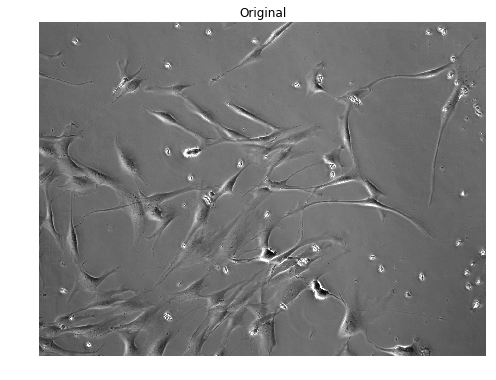

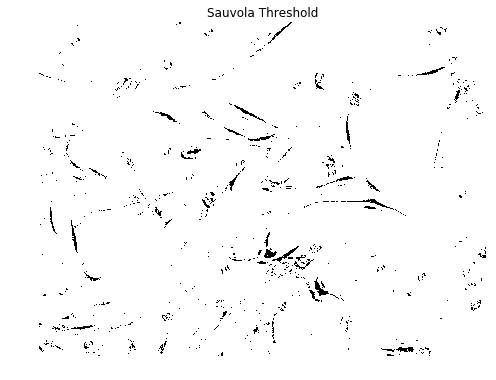

In [4]:
# binary_global = image > threshold_otsu(image)

window_size = 25
# thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

# binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 8))
# plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

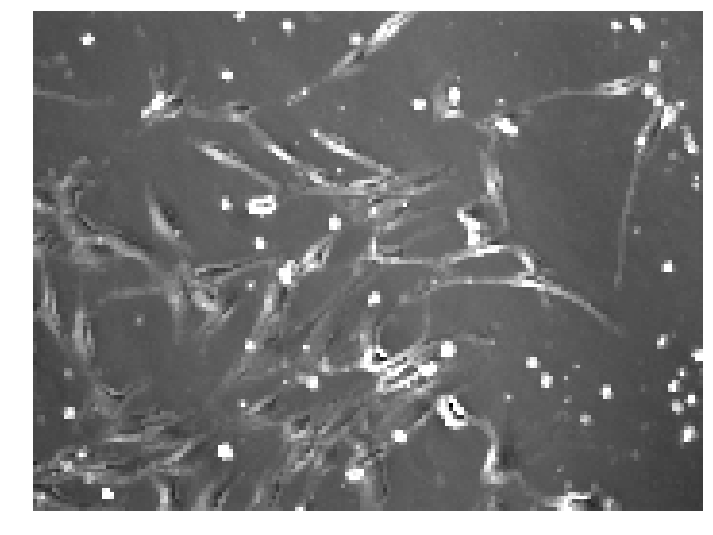

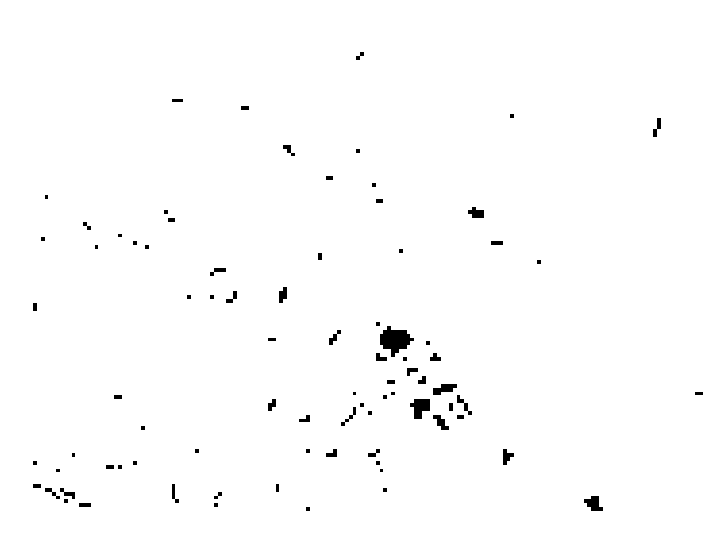

In [5]:
_wmp = 8
mp_image = skimage.measure.block_reduce(image, (_wmp,_wmp), np.max)

window_size = 25
thresh_sauvola = threshold_sauvola(mp_image, window_size=window_size)
binary_sauvola = mp_image > thresh_sauvola

plt.figure(figsize=(12, 12))
plt.imshow(mp_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

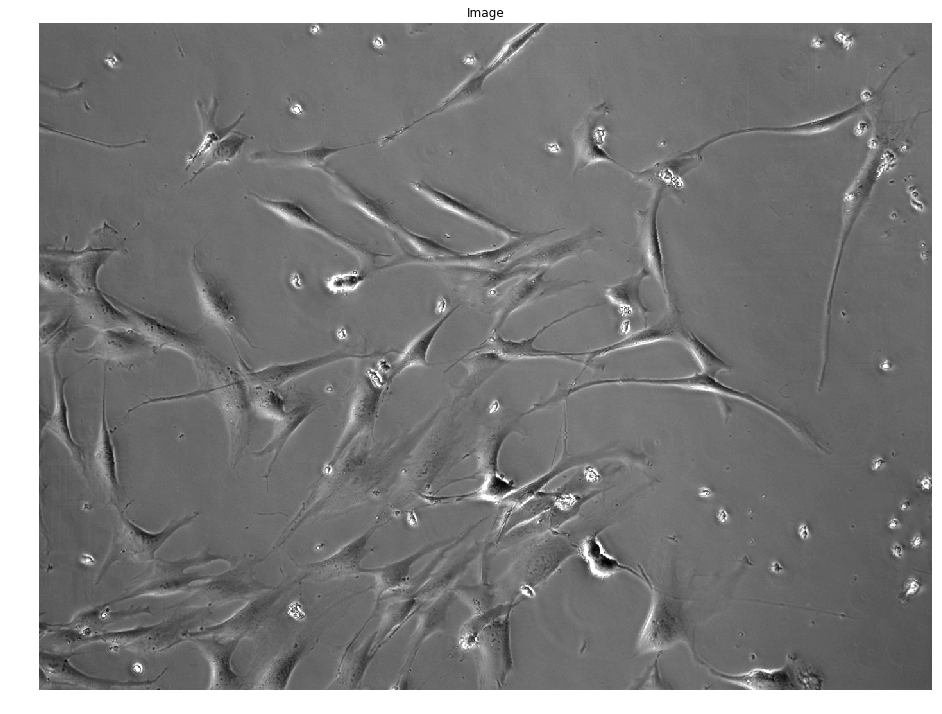

In [6]:
plt.figure(figsize=(16, 16))
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Image')
plt.axis('off')
plt.show()

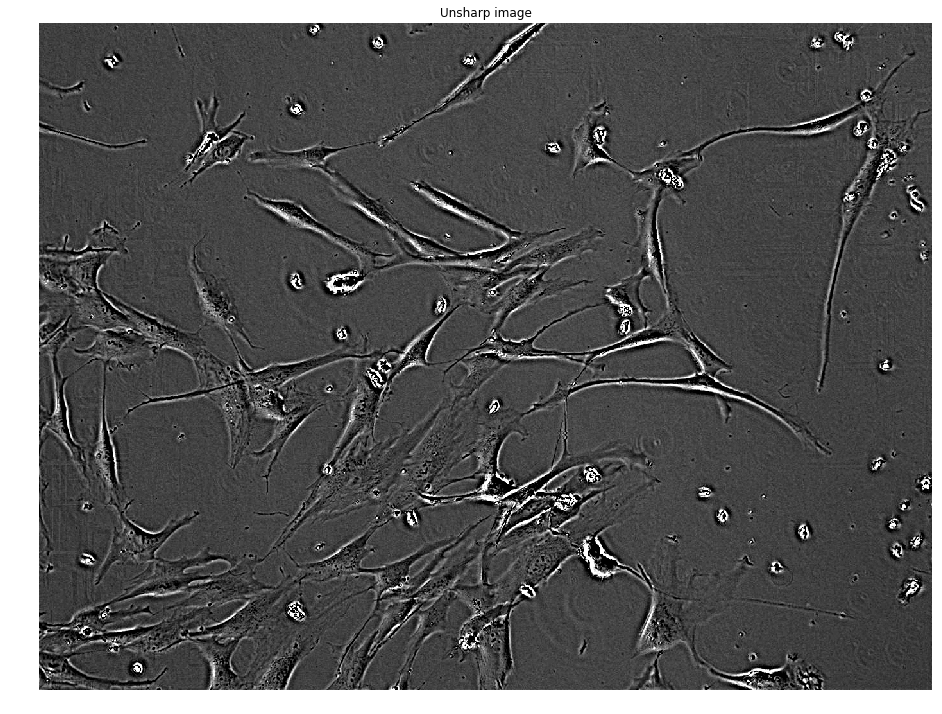

In [7]:
gaussian_3 = cv2.GaussianBlur(image, (15,15), 5.0)
unsharp_image = cv2.addWeighted(image, 1.0 + 4.0, gaussian_3, -4.5, 0)

plt.figure(figsize=(16, 16))
plt.imshow(unsharp_image, cmap=plt.cm.gray)
plt.title('Unsharp image')
plt.axis('off')
plt.show()

In [8]:
# with PIL
im = Image.open('../data/interim/my_labeling/3/Well A1_11__2018_07_03_09_12_31_58.jpg')

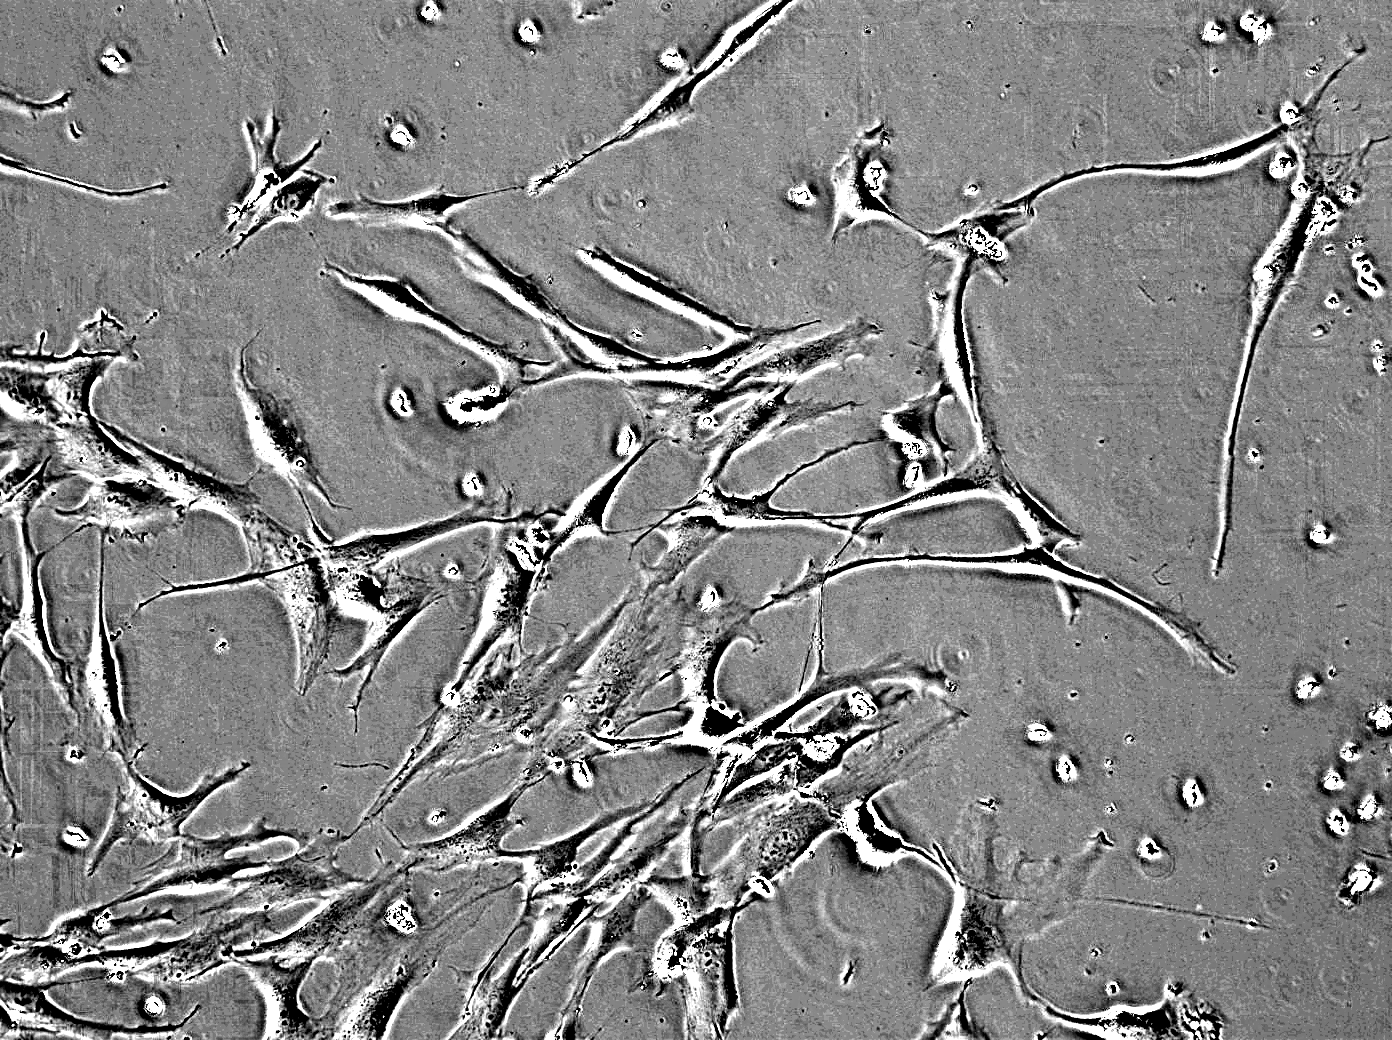

In [9]:
im2 = im.filter(ImageFilter.UnsharpMask(radius=18, percent=350, threshold=1))
im3 = im2.filter(ImageFilter.UnsharpMask(radius=5, percent=150, threshold=1))

im3

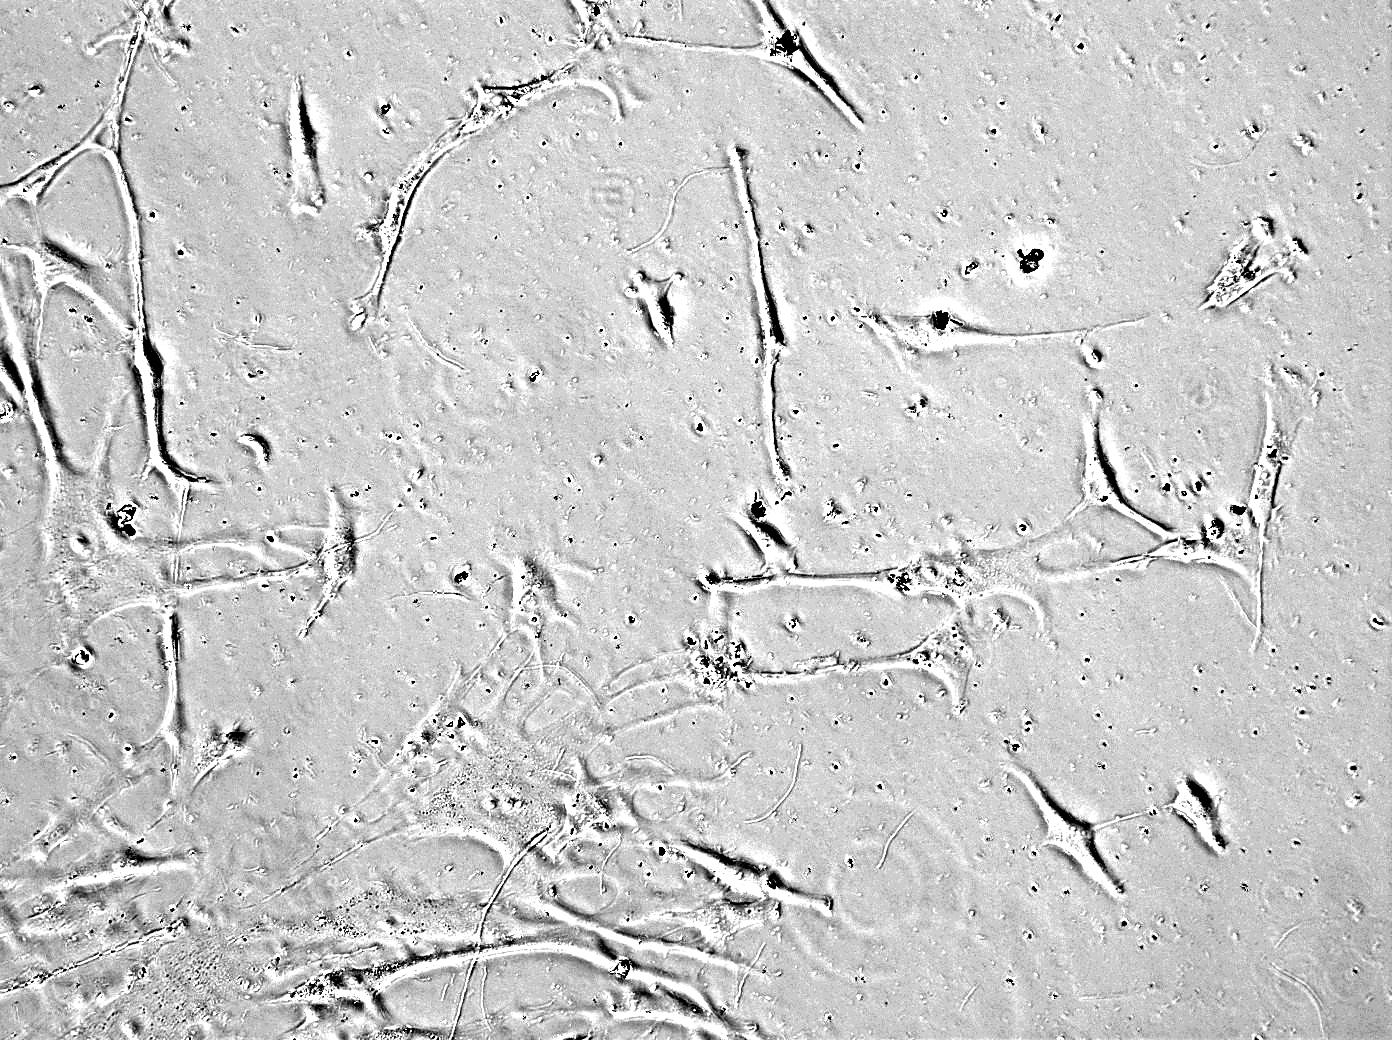

In [10]:
im = Image.open('../data/interim/raw_for_labeling/28 06 2018 mnc+MSC_Hom/Pl_2/Well B3_08__2018_07_05_13_57_11_48.jpg')
im2 = im.filter(ImageFilter.UnsharpMask(radius=10, percent=550, threshold=1))
im2

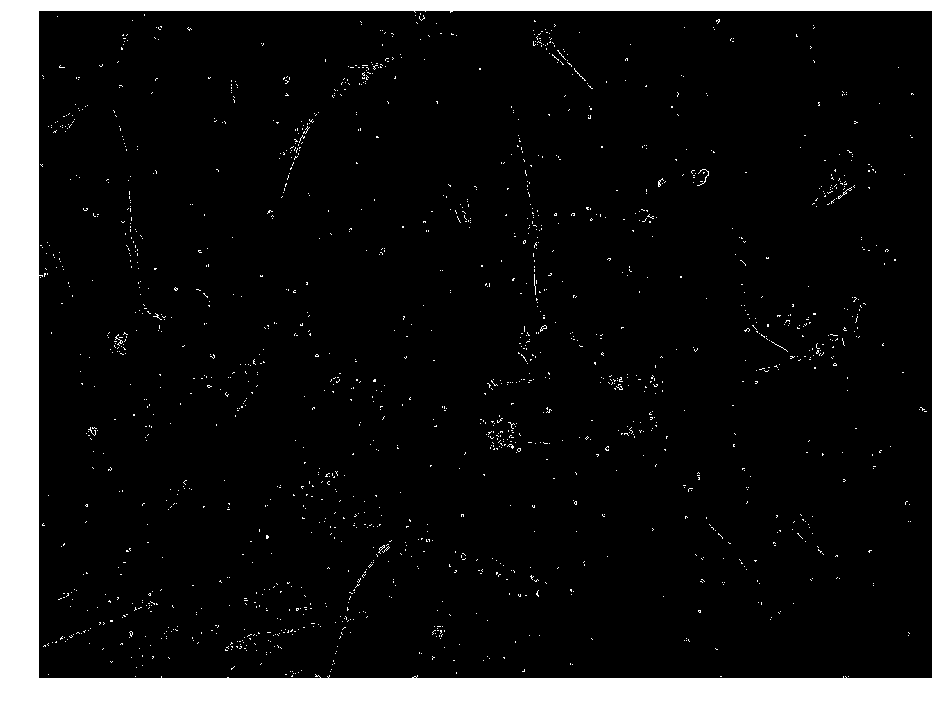

In [15]:
gaussed = np.array(im2) 
canny = cv2.Canny(gaussed, 1000,1000)

plt.figure(figsize=(16, 16))
plt.imshow(canny, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

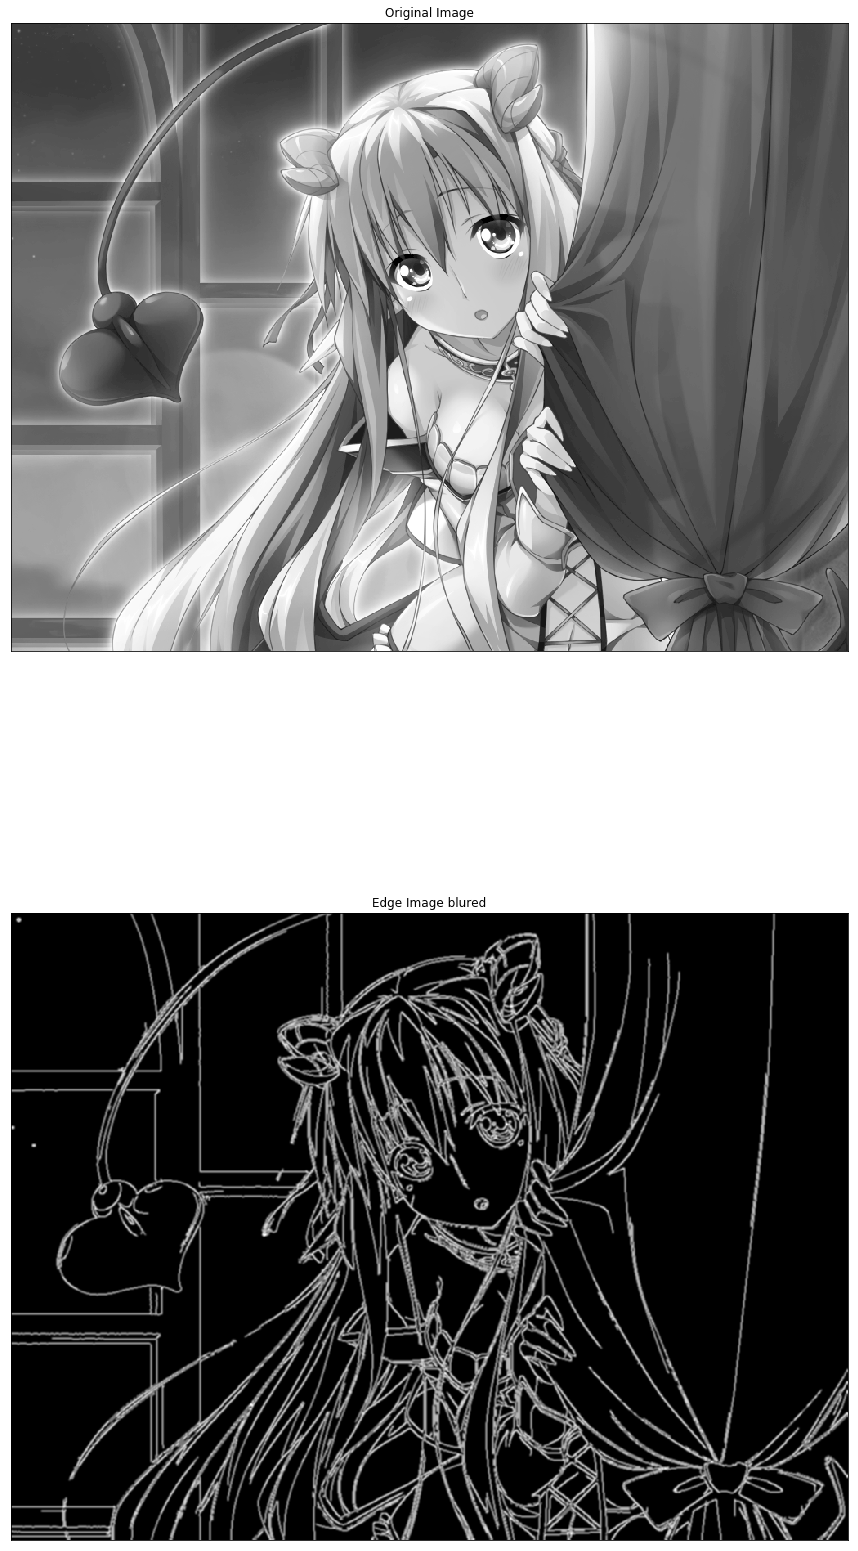

In [76]:
img = cv2.imread('/home/mr/Pictures/anm/8e35adebace58d208aa51416d7d9b9627362d546.png',0)
edges = cv2.Canny(img,50,200)
blur = cv2.GaussianBlur(edges,(5,5),0)

plt.figure(figsize=(15,30))
plt.subplot(211),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(blur,cmap = 'gray')
plt.title('Edge Image blured'), plt.xticks([]), plt.yticks([])
plt.show()